In [10]:
import numpy as np

In [1]:
from sklearn.datasets import load_digits

In [7]:
dt = load_digits()
images = dt.images
labels = dt.target

In [12]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

Text(0.5, 1.0, '0')

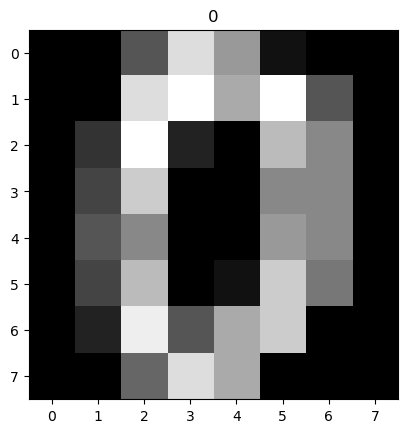

In [19]:
plt.imshow(images[0], 'gray')
plt.title(labels[0])

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from skimage.feature import hog, orb
from skimage.feature import local_binary_pattern as lbp
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
def imshow(image, title=None):
    plt.axis('off')
    plt.title(title)
    plt.imshow(image, 'gray')
    plt.show()
def showGridImage(images, labels, gsize=5,title=None):
    '''
    Function shows Multiple images.
    params: 
    images--> [Req] array of images flatten to 100*100
    labels --> [Req] array of labels (image class)
    gsize --> [opt, default=5] size for the grid gsize x gsize
    title --> [opt, default=None] title for the grid
    '''
    selected_indices = np.random.choice(len(images), size=gsize*gsize, replace=False)

    # Create a 5x5 grid for subplots
    fig, axes = plt.subplots(gsize,gsize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selected_indices[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"Image {classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [20]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
LPBFeaturesFlatten = []
LBPFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        lbpFeat = lbp(image, P=8, R=1, method='uniform')
        LBPFeatures.append(lbpFeat)
        LPBFeaturesFlatten.append(lbpFeat.flatten())
        label = classes.index(cls)
        labels.append(label)

In [14]:
LBPFeatures[0].shape

(100, 100)

In [21]:
features = np.array(LPBFeaturesFlatten)
labels = np.array(labels)

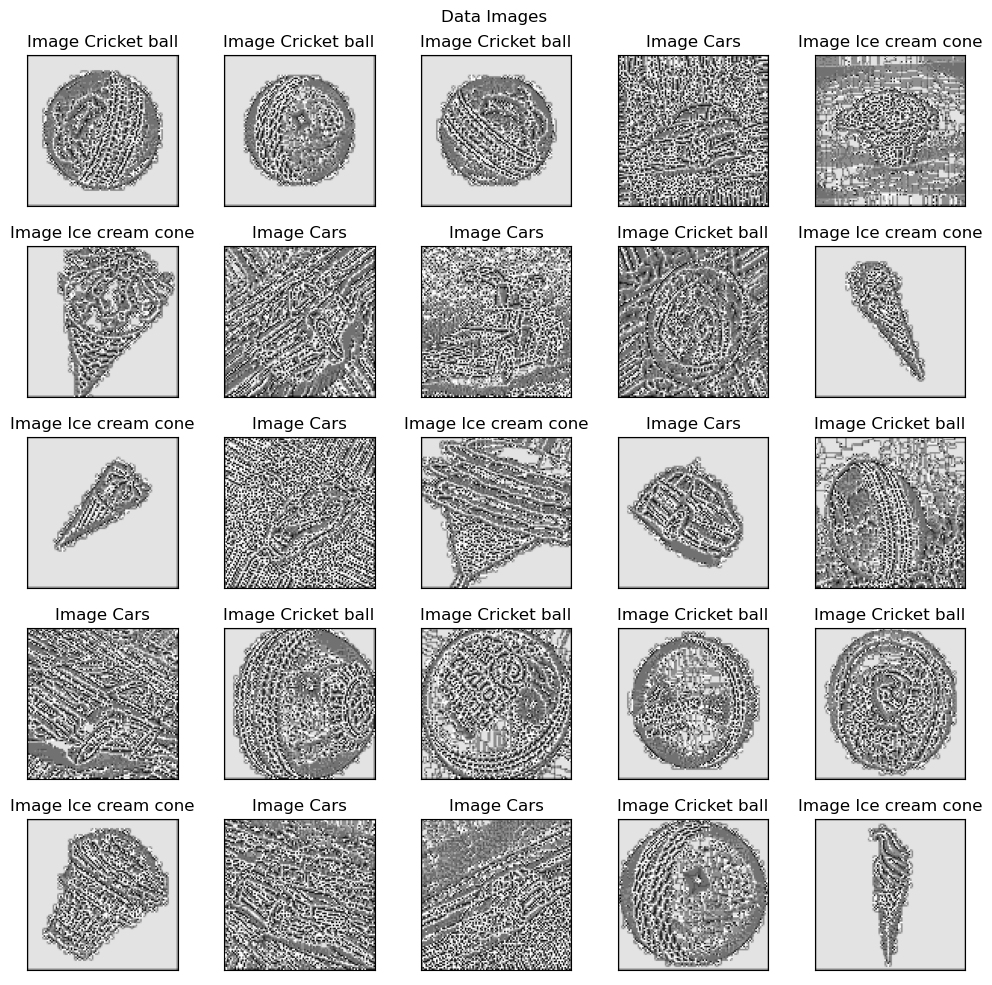

In [22]:
showGridImage(LBPFeatures,labels ,5, 'Data Images')

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.2, random_state=0)
xTrainFeatures, xTestFeatures, yTrainFeatures, yTestFeatures = train_test_split(LBPFeatures, labels, test_size=0.2, random_state=0)

In [24]:
logisticReg = LogisticRegression()
logisticReg.fit(xTrain, yTrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predsClasses = logisticReg.predict(xTest)

In [26]:
trainAccuracy = logisticReg.score(xTrain, yTrain)
testAccuracy = logisticReg.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 100.00%
Test Accuracy: 74.75%


<AxesSubplot:>

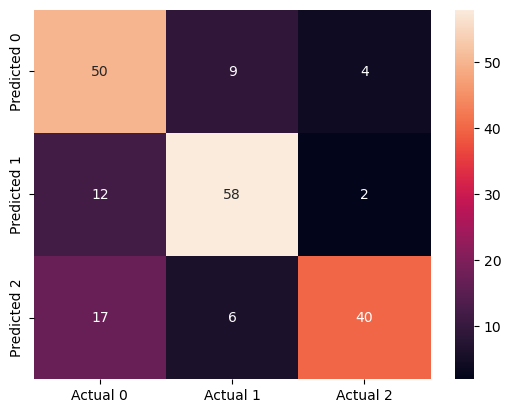

In [27]:
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

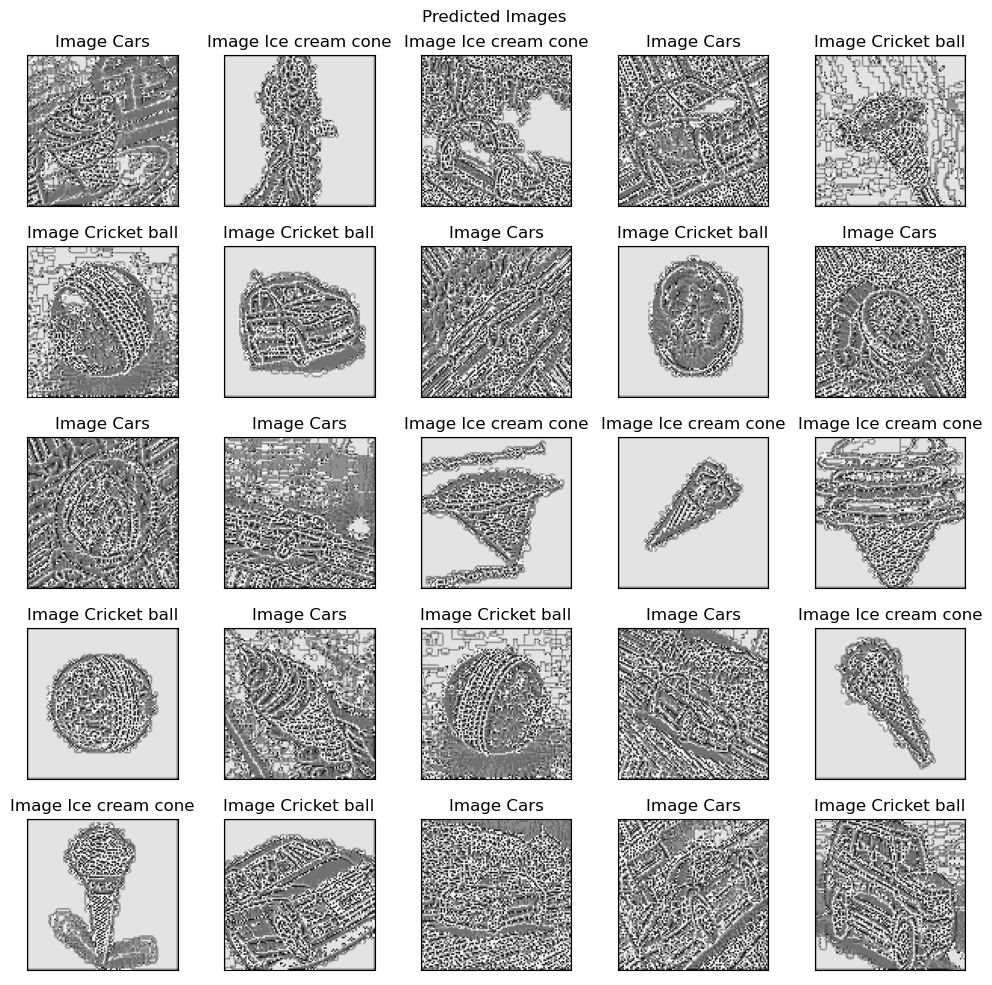

In [29]:
showGridImage(xTestFeatures, predsClasses, 5, 'Predicted Images')

In [ ]:
mainPath = './Image Classification/'
classes = os.listdir(mainPath)
LPBFeaturesFlatten = []
LBPFeatures = []
labels = []
for cls in classes:
    clsPath = os.path.join(mainPath,cls)
    for imgName in os.listdir(clsPath):
        imgPath = os.path.join(clsPath, imgName)
        image = cv2.imread(imgPath, 0)
        image = cv2.resize(image, (100,100))
        lbpFeat = lbp(image, P=8, R=1, method='uniform')
        LBPFeatures.append(lbpFeat)
        LPBFeaturesFlatten.append(lbpFeat.flatten())
        label = classes.index(cls)
        labels.append(label)

In [35]:
features = np.array(LPBFeaturesFlatten)
labels = np.array(labels)

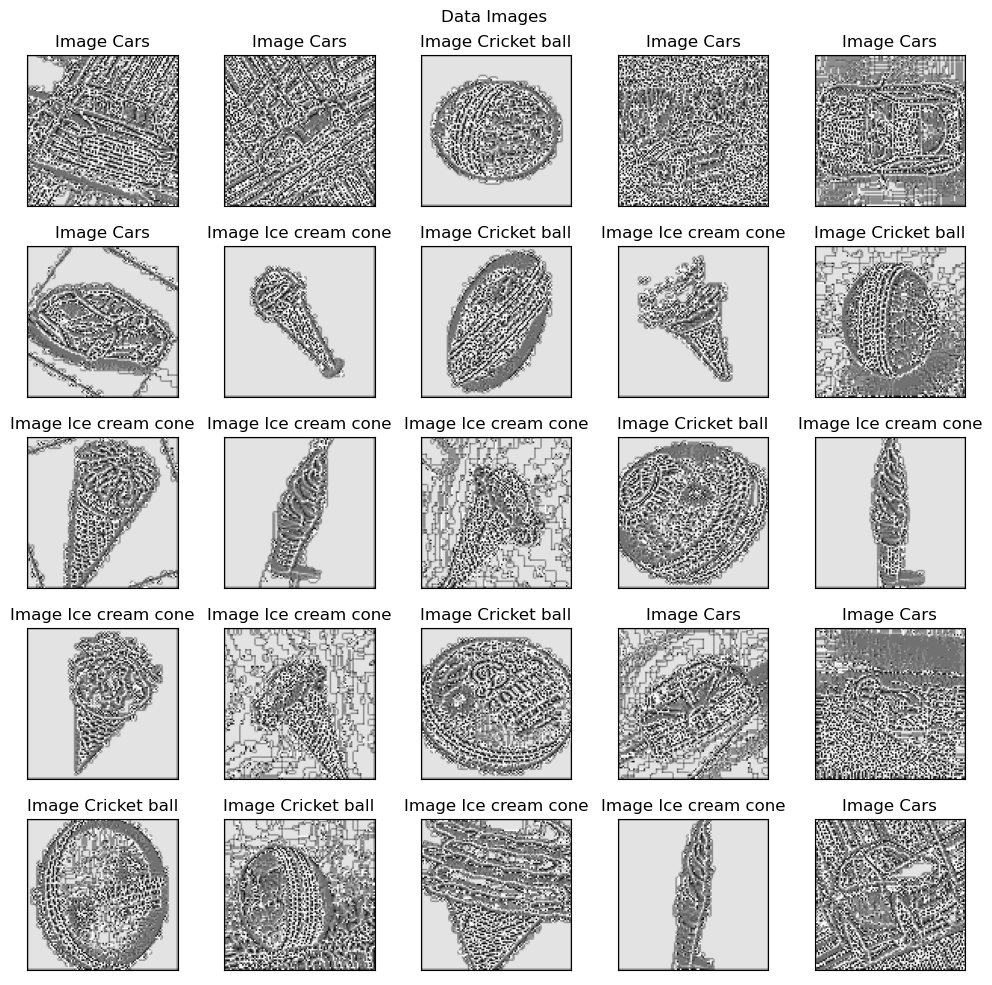

In [36]:
showGridImage(LBPFeatures,labels ,5, 'Data Images')

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.2, random_state=0)
xTrainFeatures, xTestFeatures, yTrainFeatures, yTestFeatures = train_test_split(LBPFeatures, labels, test_size=0.2, random_state=0)

In [38]:
SVMClassifier = SVC()
SVMClassifier.fit(xTrain, yTrain)

SVC()

In [39]:
predsClasses = SVMClassifier.predict(xTest)

In [40]:
trainAccuracy = SVMClassifier.score(xTrain, yTrain)
testAccuracy = SVMClassifier.score(xTest,yTest)
print(f'Training Accuracy: {trainAccuracy*100:.2f}%')
print(f'Test Accuracy: {testAccuracy*100:.2f}%')

Training Accuracy: 97.72%
Test Accuracy: 77.78%


<AxesSubplot:>

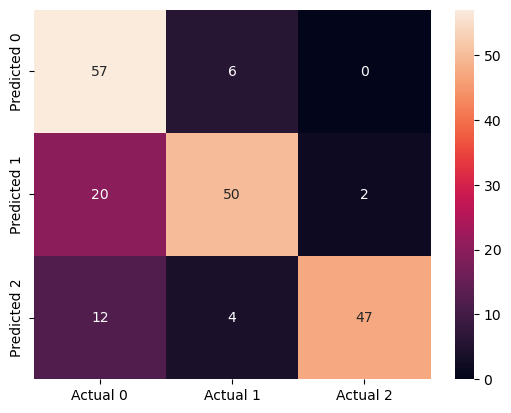

In [41]:
cmLogistic = confusion_matrix(yTest, predsClasses)
sns.heatmap(cmLogistic, annot=True, xticklabels=['Actual 0', 'Actual 1', 'Actual 2'], 
            yticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'])

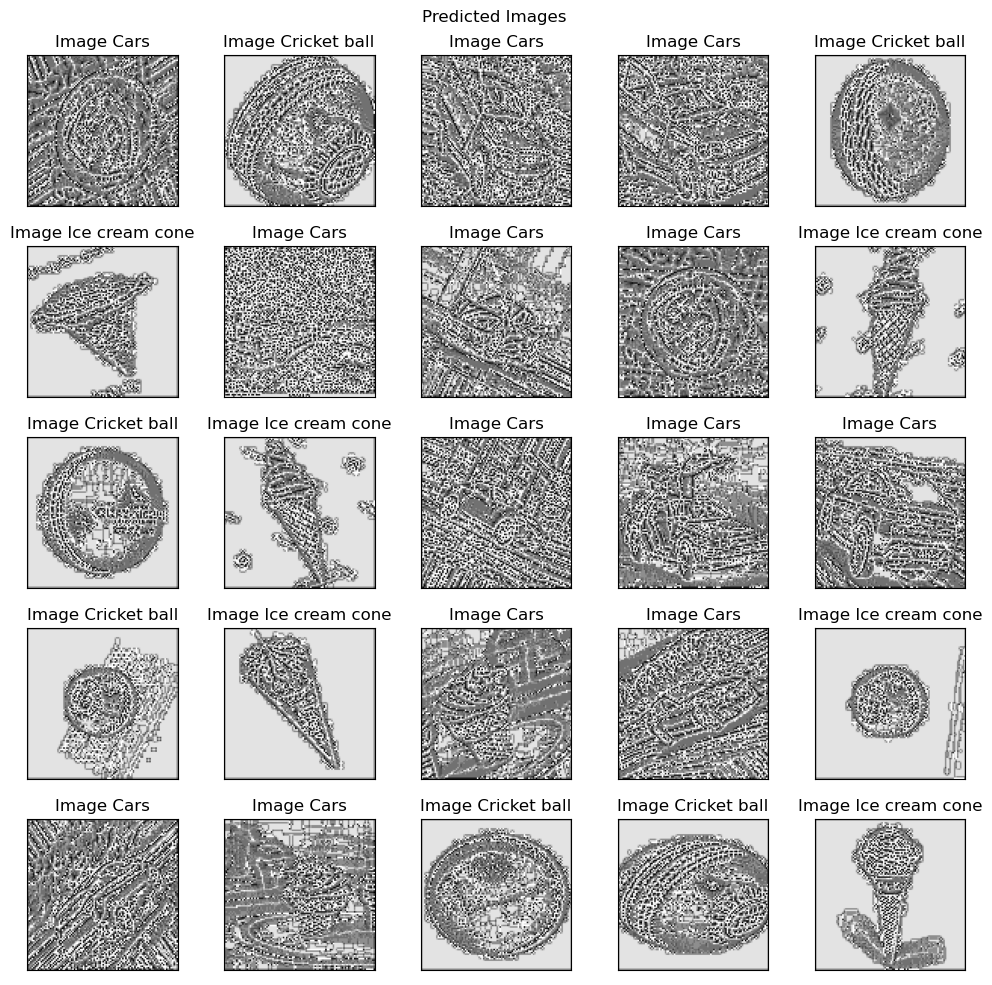

In [42]:
showGridImage(xTestFeatures, predsClasses, 5, 'Predicted Images')